# **AP157 Machine Learning Lab Assignment**
## Module 3: Dimensionality Reduction -- Principal Component Analysis of SDSS Galaxy Spectra

_Credits_: This assignment is based on the scikit-learn tutorial "Dimensionality Reduction of Astronomical Spectra" ([link](https://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/tutorial/astronomy/dimensionality_reduction.html))

For this assignment, you will work with galaxy spectra data from the
Sloan Digital Sky Survey (SDSS). First, you need to make a copy of the file ```spec4000_use.npz``` and save it to a folder in your **own Google Drive**. This file is available from the AP157 Machine Learning Google Drive (under the Datasets folder).

The code cells below will (1) mount your Google Drive and (2) load ```spec4000_corrected.npz``` from your Google Drive folder.

First, mount the Google Drive where you saved the .npy file.

When you run this cell, you will be asked to sign in to your Google account and you will get an authorization code. Paste the code on the provided cell to mount the Google Drive.

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Define the directory path to the location of the file, i.e. if it is in a
folder named "AP157" under My Drive, then the file path will be "/content/drive/My Drive/AP157". Change the string variable in the code cell below, as needed:

In [ ]:
file_path = "/content/drive/My Drive/"

Now, we can load the file using $\tt numpy$'s $\tt load$ function below.


In [ ]:
import numpy as np
data = np.load(file_path + 'Copy of spec4000_corrected.npz')

The NpzFile object is a dictionary-like object which can be queried for its list of arrays and the arrays themselves ([reference](https://numpy.org/doc/stable/reference/generated/numpy.savez.html)). Our object contains two arrays: ``spec_recons`` - 4000 reconstructed SDSS spectra each with 1000 attributes (flux in units of $10^{-17}$ erg cm$^{-2}$ s$^{-1}$ Å$^{-1}$) and ``wavelength`` - array of wavelengths (in units of Angstroms) corresponding to these attributes.

In [ ]:
data.files

['spec_recons', 'wavelength']

In [ ]:
np.shape(data['spec_recons']), np.shape(data['wavelength'])

((4000, 1000), (1000,))

Let's plot the first few spectra to visualize our data

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Sample SDSS spectra')

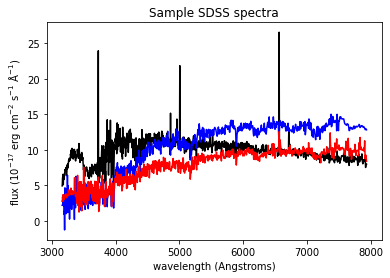

In [ ]:
wavelength = data['wavelength']
flux0 = data['spec_recons'][0,:]
flux1 = data['spec_recons'][1,:]
flux2 = data['spec_recons'][2,:]

plt.plot(wavelength, flux0, 'k-')
plt.plot(wavelength, flux1, 'b-')
plt.plot(wavelength, flux2, 'r-')
plt.ylabel("flux ($10^{-17}$ erg cm$^{-2}$ s$^{-1}$ Å$^{-1}$)")
plt.xlabel("wavelength (Angstroms)")
plt.title("Sample SDSS spectra")

#### PART 1 - Get mean normalized spectrum *(25 pts.)*

Plot the mean spectrum by first normalizing the spectra and plot the mean and standard deviation. For this, you may use the ``normalize`` function in scikit-learn's preprocessing module [(documentation)](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.normalize.html). Describe the mean spectrum and note wavelengths with the highest variation across the sample. What is the reason for this variation?


**DISCUSSION**

We aim to get the mean spectrum by normalizing the spectra from the data. We do this using Scikit-learn's normalize function. We overlay the deviation to the mean to visualize how our data looks like by using the adding and subtracting the standard deviation to the mean.


0.07268671


Text(0.5, 1.0, 'Mean and Standard Deviation of a Normalized Spectra')

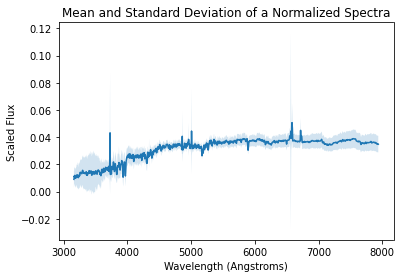

In [ ]:
from sklearn.preprocessing import normalize

# We first normalize the spectra and get the mean and standard deviation
spec_normalized = normalize(data['spec_recons'])
spec_mean = spec_normalized.mean(0)
spec_std = spec_normalized.std(0)
print(max(spec_std))

# To visualize the deviation from the mean of the normalized spectra, we plot the mean plus and minus the standard deviation.
plus, minus = spec_mean-spec_std, spec_mean+spec_std

# Plot customization
plt.fill_between(wavelength, plus, minus, alpha = 0.2) #set alpha = 0.2 for better visualization
plt.plot(wavelength, spec_mean)
plt.ylabel("Scaled Flux")
plt.xlabel("Wavelength (Angstroms)")
plt.title("Mean and Standard Deviation of a Normalized Spectra")

From the figure above, we see that the mean of the spectra ranges from the around 0.01 to 0.05, and occasionally, we see peaks in the mean and the deviation. For example, we see that the maximum deviation occurs at around 6500 Angstroms. This corresponds to the H-alpha emission line, which is a deep-red visible spectral line in the Balmer series. This is the strongest in the galaxy spectra, thus we expect that the deviation from the normal is large here.

We also see other spikes as well near the 5000-Angstrom portion. This corresponds to the green peaks caused by the presence of oxygen at 4959 and 5007 Angstroms, signifying that new stars are forming. Meanwhile, we also see a peak near the 6700-Angstrom mark, which is created by the presence of sulfur at 6717 and 6731 Angstroms.

Galaxy spectra reading obtained [here](http://star-www.st-and.ac.uk/~spd3/Teaching/PHYS1002/phys1002_lecture6.pdf).

#### PART 2 - Get principal components *(75 pts.)*

Perform Principal Component Analysis (PCA) and visualize the top principal components:
1. Get the first 4 principal components using the ``PCA`` function in scikit-learn's decomposition module [(documentation)](https://scikit-learn.org/0.15/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA). Make sure to use the normalized spectra as input. *(25 pts.)*


**DISCUSSION**

Principal Component Analysis reduces the dimensions that we will have to analyze for our very large dataset. In the code below, we get the first four principal components of the normalized spectra.

We just added `np.shape `to see the dimensions of our array and we confirm that we have reduced our 1000 attributed to just 4.

In [ ]:
from sklearn.decomposition import PCA

X = spec_normalized # We use the normalized spectra as input
pca = PCA(n_components=4) #Get the first 4 principal components
X_fit = pca.fit_transform(X)
np.shape(X_fit) #display the shape of the array

(4000, 4)

2. Plot the first two principal components (coefficient 1 in the x axis and coefficient 2 in the y axis). Make sure to label the axes and good to set x and y axis limits to be equal. *(25 pts.)*

The principal components corresponds to the direction of the data with maximum variance, or in other words, it holds the most information on the data. It can be seen as a new axis where it is best to evaluate our data. Here, we plot the first two principal components against each other, which shows their intersections or they have similar features.

Text(0.5, 1.0, 'First Two Principal Components')

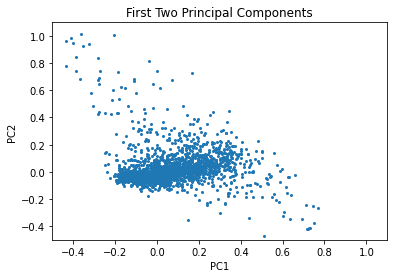

In [ ]:
plt.scatter(X_fit[:, 0], X_fit[:, 1], s=4)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.ylim(-0.5,1.1)
plt.xlim(-0.5,1.1)
plt.title('First Two Principal Components')

In the plot above, we see that the points are concentrated at around -0.2 to 0.2 for the y-axis and -0.2 to 0.4 for the x-axis. We now have a two-dimensional data visualization.

3. Plot the first 4 eigenvectors together with the mean spectrum. Add an arbitrary y-offset between the spectra for clarity. *(25 pts.)*

The eigenvalues and vectors give us the variance carried in each principal component. The first component tells us the relative flux difference between the high and low wavelengths, while the second component encapsulates the emission and absorption characteristics (Source: [Scikits learn](https://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/tutorial/astronomy/dimensionality_reduction.html)).

In this part, we plot the first four eigenvectors with the mean spectrum.

Text(0.5, 1.0, 'Mean spectrum and the first four eigenvectors with Y-offset')

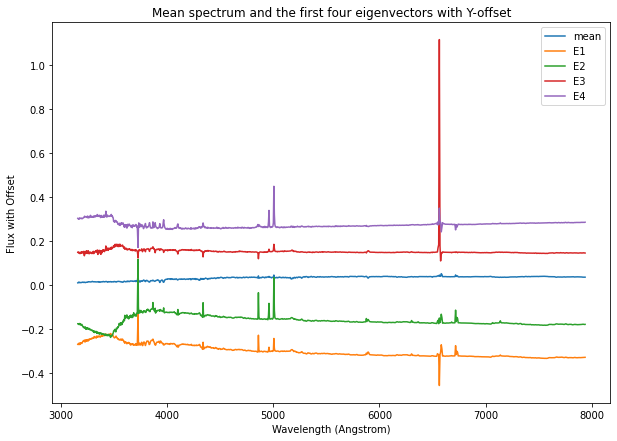

In [ ]:
plt.figure(figsize=(10,7)) # We enlarged the image for easier observation
# we added an arbitrary y-offset between the spectra for clarity. We kept the mean at its original position.
plt.plot(wavelength, spec_mean , label ='mean')
plt.plot(wavelength, pca.components_[0] - 0.3 , label ='E1')
plt.plot(wavelength, pca.components_[1] -0.15, label = 'E2')
plt.plot(wavelength, pca.components_[2] +0.15, label ='E3')
plt.plot(wavelength, pca.components_[3] +0.3, label = 'E4')

plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux with Offset')
plt.legend(loc = 'best')

plt.title('Mean spectrum and the first four eigenvectors with Y-offset')

From the plot of the eigenvectors above, we see the breakdown of the spectra in Part 1. We notice that there is a large deviation at aroung 6500 Angstroms, which we can account for the large spikes of the third eigenvector, and of the other eigenvectors as well. The spikes that we see here all correspond to the places with large deviations in our mean spectra in Part A.  